In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

In [ ]:
pip install statsmodels

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving cpu-test-a.csv to cpu-test-a (1).csv


In [ ]:
df=pd.read_csv("cpu-test-a.csv")
print(df.head())

              datetime   cpu
0  2017-01-28 01:42:00  2.19
1  2017-01-28 01:43:00  1.97
2  2017-01-28 01:44:00  2.15
3  2017-01-28 01:45:00  1.94
4  2017-01-28 01:46:00  1.81


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])  # ← lowercase!
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)

In [ ]:
print(df.head())

                      cpu
datetime                 
2017-01-28 01:42:00  2.19
2017-01-28 01:43:00  1.97
2017-01-28 01:44:00  2.15
2017-01-28 01:45:00  1.94
2017-01-28 01:46:00  1.81


In [ ]:
# Fit ARIMA
series = df['cpu']
model = ARIMA(series, order=(1, 1, 1))
fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency min will be used.
  self._init_dates(dates, freq)


In [ ]:
# Forecast and residuals
forecast = fit.predict(start=1, end=len(series)-1, dynamic=False)
residuals = series[1:] - forecast

In [ ]:
# Detect anomalies
threshold = 3 * np.std(residuals)
anomalies = residuals[np.abs(residuals) > threshold]


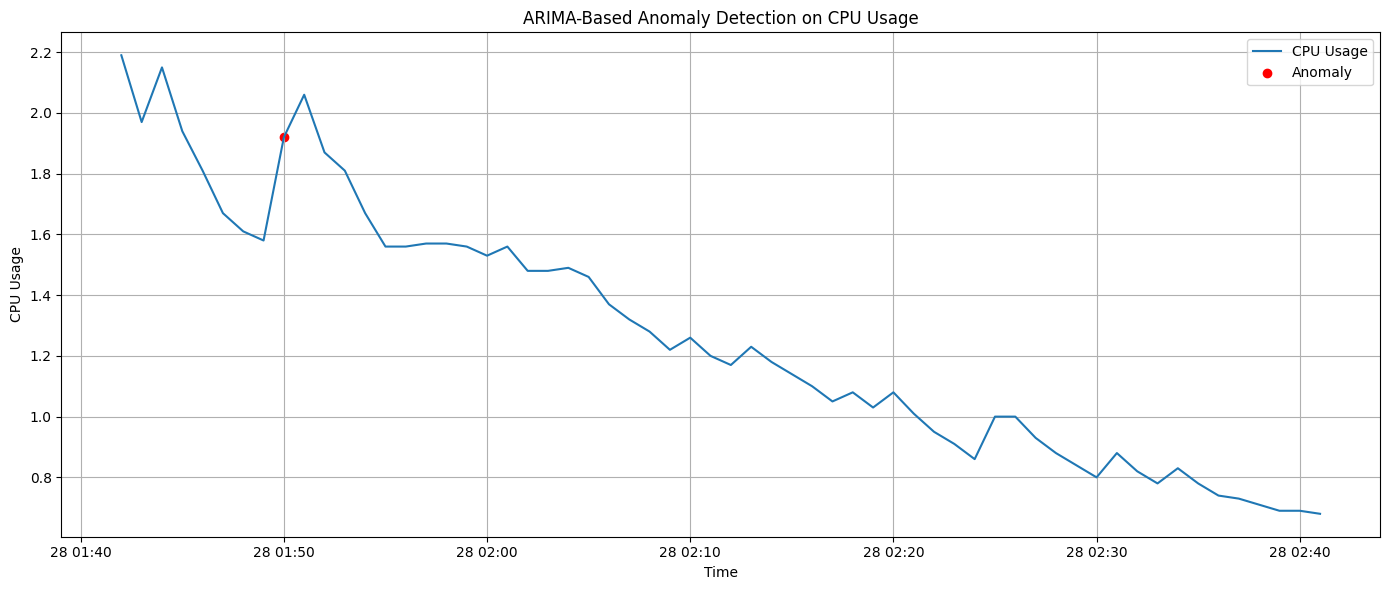

In [ ]:
# Plot
plt.figure(figsize=(14, 6))
plt.plot(series, label='CPU Usage')
plt.scatter(anomalies.index, series[anomalies.index], color='red', label='Anomaly')
plt.title('ARIMA-Based Anomaly Detection on CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()